In [2]:
import pandas as pd
import re
import string
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import nltk.data
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls "/content/drive/MyDrive/Colab Notebooks"

 Amazon_Reviews_ETL.ipynb       Untitled
'articles (1).csv'	        Untitled0.ipynb
'articles (2).csv'	       'Untitled (1)'
'articles (3).csv'	        Untitled1.ipynb
 Challenge16.ipynb	       'Untitled (2)'
 clean_model_training.ipynb     Untitled2.ipynb
 Copy_of_model_training.ipynb  'Untitled (3)'
'Copy of Pipleine.ipynb'        Untitled3.ipynb
'Copy of Untitled2.ipynb'      'Untitled (4)'
 ETL.ipynb		        Untitled4.ipynb
'Example 1.ipynb'	       'Untitled (5)'
 Nida_model_training.ipynb      Untitled5.ipynb
 NLP.csv		       'Untitled (6)'
 NLP_draft.ipynb	       'Untitled (7)'
 NLP.ipynb		       'Untitled (8)'
 Pipleine.ipynb		        Vine_Review_Analysis.ipynb


In [5]:
import pandas as pd
import io

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/articles (3).csv',sep='\t') 

In [7]:
df["article"] = df["title"] +" "+ df['text']
df.head(2)

,articlesid,fakeid,trueid,title,text,subject,label,article
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...


In [8]:
df.loc[0, 'article']

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

In [9]:
import re
def wordpre(title):
    title = title.lower()
    # title = re.sub(r"(\w+)'s", r'\1s', title) #removing ' between word and s and joing s with the word
    # title = re.sub(r"(\w+)'t", r'\1t', title) #removing ' between word and t and joing t with the word
    # title = re.sub(r'(\w+).(\w+)',r'\1', title) # removing . between words and joining words
    title = re.sub('\[.*?\]', '', title)
    title = re.sub("\\W"," ",title) # remove special chars
    title = re.sub('https?://\S+|www\.\S+', '', title)
    title = re.sub('<.*?>+', '', title)
    title = re.sub('[%s]' % re.escape(string.punctuation), '', title)
    title = re.sub('\n', '', title)
    title = re.sub('\w*\d\w*', '', title)
    
    return title

In [10]:
##  Applying the wordpre method to the dataset
df['text_wordpre']= df['text'].apply(wordpre)
df['title_wordpre']= df['title'].apply(wordpre)
df['article_wordpre']= df['article'].apply(wordpre)
df

,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new year ...,donald trump sends out embarrassing new year ...
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obama s name...,trump is so obsessed he even has obama s name...
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...
...,...,...,...,...,...,...,...,...,...,...,...
38640,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday we...,fully committed nato backs new u s approach...,fully committed nato backs new u s approach...
38641,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of l...,lexisnexis withdrew two products from chinese ...,lexisnexis withdrew two products from chinese ...
38642,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0,Minsk cultural hub becomes haven from authorit...,minsk reuters in the shadow of disused sov...,minsk cultural hub becomes haven from authorities,minsk cultural hub becomes haven from authorit...
38643,38644,NaN,21416.0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,World News,0,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary of state ...,vatican upbeat on possibility of pope francis ...,vatican upbeat on possibility of pope francis ...


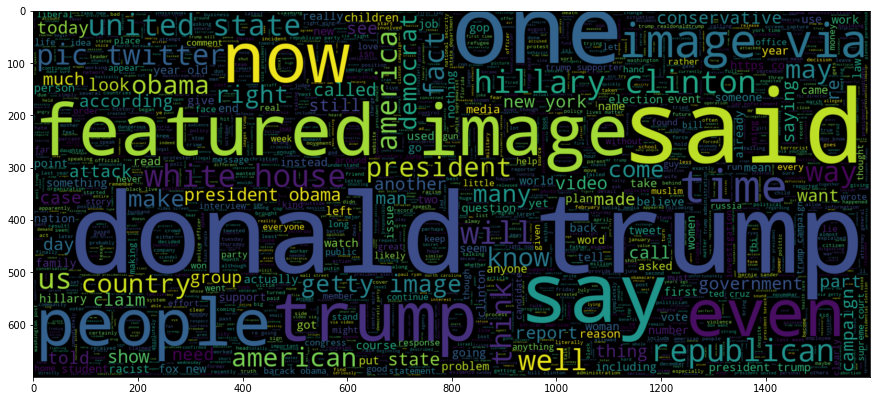

In [11]:
#word used in fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df[df.label== 1].article_wordpre))
plt.imshow(wc, interpolation="bilinear")

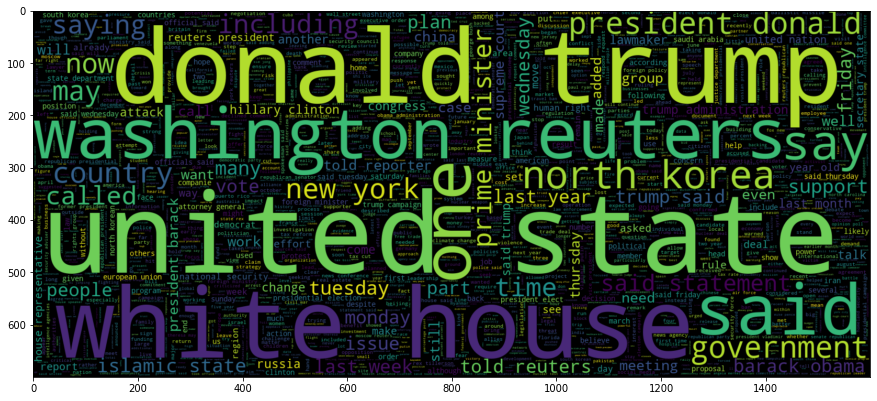

In [12]:
#word used in true news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df[df.label== 0].article_wordpre))
plt.imshow(wc, interpolation="bilinear")

In [17]:
#Word count
title_wordcount = df['title_wordpre'].apply(len)
df['title_count']= title_wordcount

text_wordcount = df['text_wordpre'].apply(len)
df['text_count']= text_wordcount

article_wordcount = df['article_wordpre'].apply(len)-1
df['article_count']= article_wordcount

df.head(5)

,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new year ...,donald trump sends out embarrassing new year ...,79,2702,2781
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1894,1963
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...,90,3384,3474
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obama s name...,trump is so obsessed he even has obama s name...,78,2604,2682
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...,70,2346,2416


In [18]:
#Downloading nltk StopWords and Wordnet 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['title_stop'] = df['title_wordpre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['text_stop'] = df['text_wordpre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['article_stop'] = df['article_wordpre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head(5)

# def extra_word_removal (text):
#     return [char for char in text if char not in ["’", ',','\"','s','u','t']]
# df['text_clean']= df['text_wordpre'].apply(extra_word_removal)
# df['title_clean']= df['title_wordpre'].apply(extra_word_removal)
# df['article_clean']= df['article_wordpre'].apply(extra_word_removal)
# df

,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count,title_stop,text_stop,article_stop
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new year ...,donald trump sends out embarrassing new year ...,79,2702,2781,donald trump sends embarrassing new year eve m...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new year eve m...
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1894,1963,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...,90,3384,3474,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obama s name...,trump is so obsessed he even has obama s name...,78,2604,2682,trump obsessed even obama name coded website i...,christmas day donald trump announced would bac...,trump obsessed even obama name coded website i...
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...,70,2346,2416,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,pope francis called donald trump christmas spe...


In [20]:
# Top 10 words in true articles
# QUESTION FOR CATHY - How do I remove u from the list?
df_true = df.loc[df['label']==0]
dtt = df_true['article_stop']
from collections import Counter
p = Counter(" ".join(dtt).split()).most_common(10)
rsltt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rsltt)

         Word  Frequency
0        said      97828
1       trump      59579
2           u      48650
3       would      31458
4     reuters      28784
5   president      28366
6       state      21439
7  government      18963
8       house      17904
9         new      17606


In [21]:
# Top 10 words in fake articles
df_fake = df.loc[df['label']==1]

# # Removing extra
# def extra_word_removal (text):
#     return [char for char in text if char not in ["’", ',','\"','s','u', 't']]

# df_fake['article_clean_extra'] = df_fake['text_wordpre'].apply(extra_word_removal)

dt = df_fake['article_stop']

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

        Word  Frequency
0      trump      75557
1       said      24953
2  president      21553
3     people      21546
4        one      19325
5      would      18437
6     donald      16004
7      obama      15039
8       like      14640
9    clinton      14281


In [22]:
# Tokenizing words in title
from nltk import word_tokenize
nltk.download('punkt')
df['title_tokenized'] = df['title_stop'].apply(word_tokenize)
df['text_tokenized'] = df['text_stop'].apply(word_tokenize)
df['article_tokenized'] = df['article_stop'].apply(word_tokenize)
df.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count,title_stop,text_stop,article_stop,title_tokenized,text_tokenized,article_tokenized
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new year ...,donald trump sends out embarrassing new year ...,79,2702,2781,donald trump sends embarrassing new year eve m...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new year eve m...,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, sends, embarrassing, new, year..."
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1894,1963,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus..."
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...,90,3384,3474,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...,"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...","[sheriff, david, clarke, becomes, internet, jo..."
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obama s name...,trump is so obsessed he even has obama s name...,78,2604,2682,trump obsessed even obama name coded website i...,christmas day donald trump announced would bac...,trump obsessed even obama name coded website i...,"[trump, obsessed, even, obama, name, coded, we...","[christmas, day, donald, trump, announced, wou...","[trump, obsessed, even, obama, name, coded, we..."
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...,70,2346,2416,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,pope francis called donald trump christmas spe...,"[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ...","[pope, francis, called, donald, trump, christm..."


In [26]:
# length of text and title after tokenizing

#length of title
title_tok_wordcount = df['title_tokenized'].apply(len)
df['title_tokenized_count']= title_tok_wordcount

# length of text
text_tok_wordcount = df['text_tokenized'].apply(len)
df['text_tokenized_count']= text_tok_wordcount

# length of article
article_tok_wordcount = df['article_tokenized'].apply(len)
df['article_tokenized_count']= article_tok_wordcount

df.head(2)

,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count,title_stop,text_stop,article_stop,title_tokenized,text_tokenized,article_tokenized,title_tokenized_count,text_tokenized_count,article_tokenized_count
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new year ...,donald trump sends out embarrassing new year ...,79,2702,2781,donald trump sends embarrassing new year eve m...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new year eve m...,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, sends, embarrassing, new, year...",9,258,267
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1894,1963,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus...",8,184,192


In [27]:
# POS_Tag features

nltk.download('averaged_perceptron_tagger')
ndf = pd.DataFrame()
text = df['article_wordpre'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize) # QUESTION FOR CATHY : SHOULD WE USE THIS ON article_stop columm?
from collections import Counter
for i in text: 
    N = nltk.pos_tag(i)
    C = Counter([j for i,j in N])
    S = pd.Series([C])
    N = pd.DataFrame.from_records(S, columns = S.sum().keys())
    ndf = pd.concat([ndf, N], ignore_index=True, sort=False)
ndf

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,JJ,NN,VBZ,RP,VBG,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,NNS,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,'',POS,$,SYM
0,58.0,103.0,16.0,2.0,8.0,20.0,39.0,36.0,28.0,15.0,22.0,33.0,11.0,14.0,9.0,31.0,3.0,2.0,2.0,2.0,6.0,5.0,5.0,1.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35.0,100.0,9.0,1.0,11.0,1.0,30.0,11.0,4.0,8.0,9.0,38.0,18.0,9.0,2.0,17.0,NaN,3.0,1.0,NaN,9.0,1.0,2.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58.0,157.0,14.0,3.0,8.0,25.0,38.0,18.0,32.0,9.0,35.0,64.0,19.0,18.0,15.0,34.0,NaN,1.0,2.0,1.0,18.0,5.0,3.0,1.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29.0,150.0,24.0,5.0,6.0,9.0,44.0,26.0,21.0,10.0,13.0,46.0,12.0,10.0,5.0,15.0,1.0,NaN,2.0,NaN,15.0,6.0,3.0,NaN,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29.0,80.0,8.0,3.0,4.0,12.0,43.0,17.0,27.0,16.0,13.0,65.0,19.0,20.0,15.0,31.0,NaN,2.0,NaN,NaN,13.0,4.0,6.0,NaN,NaN,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,50.0,103.0,8.0,4.0,11.0,5.0,36.0,21.0,24.0,17.0,11.0,54.0,27.0,19.0,14.0,34.0,NaN,NaN,3.0,3.0,17.0,6.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38641,14.0,38.0,1.0,NaN,1.0,1.0,15.0,1.0,3.0,2.0,4.0,17.0,11.0,4.0,2.0,7.0,NaN,3.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38642,32.0,78.0,19.0,3.0,2.0,7.0,38.0,13.0,8.0,12.0,11.0,41.0,12.0,6.0,2.0,23.0,NaN,1.0,NaN,1.0,11.0,1.0,3.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38643,27.0,53.0,2.0,NaN,5.0,1.0,19.0,9.0,9.0,5.0,6.0,30.0,16.0,6.0,2.0,9.0,NaN,1.0,1.0,NaN,3.0,1.0,2.0,NaN,NaN,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# replacing NAN with 0
ndf.fillna(0).head(5)

,JJ,NN,VBZ,RP,VBG,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,NNS,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,'',POS,$,SYM
0,58.0,103.0,16.0,2.0,8.0,20.0,39.0,36.0,28.0,15.0,22.0,33.0,11.0,14.0,9.0,31.0,3.0,2.0,2.0,2.0,6.0,5.0,5.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35.0,100.0,9.0,1.0,11.0,1.0,30.0,11.0,4.0,8.0,9.0,38.0,18.0,9.0,2.0,17.0,0.0,3.0,1.0,0.0,9.0,1.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58.0,157.0,14.0,3.0,8.0,25.0,38.0,18.0,32.0,9.0,35.0,64.0,19.0,18.0,15.0,34.0,0.0,1.0,2.0,1.0,18.0,5.0,3.0,1.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.0,150.0,24.0,5.0,6.0,9.0,44.0,26.0,21.0,10.0,13.0,46.0,12.0,10.0,5.0,15.0,1.0,0.0,2.0,0.0,15.0,6.0,3.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.0,80.0,8.0,3.0,4.0,12.0,43.0,17.0,27.0,16.0,13.0,65.0,19.0,20.0,15.0,31.0,0.0,2.0,0.0,0.0,13.0,4.0,6.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
ndf.to_csv("/content/drive/MyDrive/Colab Notebooks/pos_tag.csv")

In [30]:
# sort unique values
ndf.nunique().sort_values()

''        1
$         1
POS       3
SYM       4
UH        4
WP$       7
NNPS      7
PDT      10
RBR      13
RBS      14
EX       18
FW       18
NNP      20
JJS      21
RP       24
JJR      26
WRB      33
WP       38
CD       43
WDT      44
MD       62
PRP$     78
VBG     109
VBP     123
VBZ     125
TO      126
VBN     127
CC      139
PRP     143
VB      149
VBD     170
RB      171
NNS     233
DT      313
JJ      318
IN      358
NN      548
dtype: int64

In [33]:
ndf.sum().sort_values()

$            20.0
SYM          31.0
''           40.0
POS         150.0
UH          476.0
WP$        3150.0
NNPS       3579.0
FW         8318.0
RBS        9482.0
PDT       10032.0
NNP       10975.0
EX        21659.0
RBR       25889.0
JJS       31927.0
JJR       44679.0
WRB       64260.0
RP        66160.0
WDT       89997.0
WP        90513.0
CD        96067.0
MD       182457.0
PRP$     220141.0
VBP      392906.0
VBG      399489.0
VBN      430560.0
VBZ      436976.0
CC       443489.0
TO       475463.0
PRP      497105.0
RB       602768.0
VB       637428.0
VBD      705662.0
NNS     1117526.0
DT      1524978.0
JJ      1682743.0
IN      2019549.0
NN      3855574.0
dtype: float64

In [46]:
ndf.dtypes

JJ      float64
NN      float64
VBZ     float64
RP      float64
VBG     float64
VBP     float64
DT      float64
RB      float64
VB      float64
CC      float64
PRP     float64
IN      float64
VBD     float64
TO      float64
PRP$    float64
NNS     float64
JJS     float64
CD      float64
JJR     float64
RBR     float64
VBN     float64
MD      float64
WP      float64
FW      float64
NNP     float64
WRB     float64
WDT     float64
PDT     float64
EX      float64
RBS     float64
NNPS    float64
UH      float64
WP$     float64
''      float64
POS     float64
$       float64
SYM     float64
dtype: object

In [48]:
ndf.replace(np.nan, 0)

,JJ,NN,VBZ,RP,VBG,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,NNS,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,'',POS,$,SYM
0,58.0,103.0,16.0,2.0,8.0,20.0,39.0,36.0,28.0,15.0,22.0,33.0,11.0,14.0,9.0,31.0,3.0,2.0,2.0,2.0,6.0,5.0,5.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35.0,100.0,9.0,1.0,11.0,1.0,30.0,11.0,4.0,8.0,9.0,38.0,18.0,9.0,2.0,17.0,0.0,3.0,1.0,0.0,9.0,1.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58.0,157.0,14.0,3.0,8.0,25.0,38.0,18.0,32.0,9.0,35.0,64.0,19.0,18.0,15.0,34.0,0.0,1.0,2.0,1.0,18.0,5.0,3.0,1.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.0,150.0,24.0,5.0,6.0,9.0,44.0,26.0,21.0,10.0,13.0,46.0,12.0,10.0,5.0,15.0,1.0,0.0,2.0,0.0,15.0,6.0,3.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.0,80.0,8.0,3.0,4.0,12.0,43.0,17.0,27.0,16.0,13.0,65.0,19.0,20.0,15.0,31.0,0.0,2.0,0.0,0.0,13.0,4.0,6.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,50.0,103.0,8.0,4.0,11.0,5.0,36.0,21.0,24.0,17.0,11.0,54.0,27.0,19.0,14.0,34.0,0.0,0.0,3.0,3.0,17.0,6.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38641,14.0,38.0,1.0,0.0,1.0,1.0,15.0,1.0,3.0,2.0,4.0,17.0,11.0,4.0,2.0,7.0,0.0,3.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38642,32.0,78.0,19.0,3.0,2.0,7.0,38.0,13.0,8.0,12.0,11.0,41.0,12.0,6.0,2.0,23.0,0.0,1.0,0.0,1.0,11.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38643,27.0,53.0,2.0,0.0,5.0,1.0,19.0,9.0,9.0,5.0,6.0,30.0,16.0,6.0,2.0,9.0,0.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
ndf2 = ndf[['NN','JJ','NNS','VBD','RB','VBP','VBG','VBN','VB','IN','VBZ']]
ndf2['nouns'] = ndf2['NN'] + ndf2['NNS']
ndf2['verbs'] = ndf2['VBD'] + ndf2['VBG'] + ndf2['VBP'] + ndf2['VBN'] + ndf2['VB'] + ndf2['VBZ']
ndf2 = ndf2.rename(columns = {'JJ': 'adjectives', 'IN': 'prepositions', 'RB': 'adverbs'})
ndf2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NN,adjectives,NNS,VBD,adverbs,VBP,VBG,VBN,VB,prepositions,VBZ,nouns,verbs
0,103.0,58.0,31.0,11.0,36.0,20.0,8.0,6.0,28.0,33.0,16.0,134.0,89.0
1,100.0,35.0,17.0,18.0,11.0,1.0,11.0,9.0,4.0,38.0,9.0,117.0,52.0
2,157.0,58.0,34.0,19.0,18.0,25.0,8.0,18.0,32.0,64.0,14.0,191.0,116.0
3,150.0,29.0,15.0,12.0,26.0,9.0,6.0,15.0,21.0,46.0,24.0,165.0,87.0
4,80.0,29.0,31.0,19.0,17.0,12.0,4.0,13.0,27.0,65.0,8.0,111.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,103.0,50.0,34.0,27.0,21.0,5.0,11.0,17.0,24.0,54.0,8.0,137.0,92.0
38641,38.0,14.0,7.0,11.0,1.0,1.0,1.0,5.0,3.0,17.0,1.0,45.0,22.0
38642,78.0,32.0,23.0,12.0,13.0,7.0,2.0,11.0,8.0,41.0,19.0,101.0,59.0
38643,53.0,27.0,9.0,16.0,9.0,1.0,5.0,3.0,9.0,30.0,2.0,62.0,36.0


In [53]:
ndf3 = ndf2[['adjectives','adverbs','prepositions','nouns','verbs']]
ndf3

,adjectives,adverbs,prepositions,nouns,verbs
0,58.0,36.0,33.0,134.0,89.0
1,35.0,11.0,38.0,117.0,52.0
2,58.0,18.0,64.0,191.0,116.0
3,29.0,26.0,46.0,165.0,87.0
4,29.0,17.0,65.0,111.0,83.0
...,...,...,...,...,...
38640,50.0,21.0,54.0,137.0,92.0
38641,14.0,1.0,17.0,45.0,22.0
38642,32.0,13.0,41.0,101.0,59.0
38643,27.0,9.0,30.0,62.0,36.0


In [55]:
df_dummies = pd.get_dummies(df['subject'])
df_dummies.head(5)

,US News,World News
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [59]:
df_final = pd.concat([df, df_dummies,ndf3], axis=1)
df_final.head(1)

,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count,title_stop,text_stop,article_stop,title_tokenized,text_tokenized,article_tokenized,title_tokenized_count,text_tokenized_count,article_tokenized_count,US News,World News,adjectives,adverbs,prepositions,nouns,verbs
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new year ...,donald trump sends out embarrassing new year ...,79,2702,2781,donald trump sends embarrassing new year eve m...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new year eve m...,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, sends, embarrassing, new, year...",9,258,267,1,0,58.0,36.0,33.0,134.0,89.0


In [58]:
df_final.to_csv("/content/drive/MyDrive/Colab Notebooks/NLP.csv")

In [62]:
df_final_numbers = df_final.drop(['text_wordpre', 'title_wordpre', 'article_wordpre', 'text_stop', 'title_stop', 'article_stop', 'title_tokenized', 'text_tokenized', 'article_tokenized'], axis = 1)
df_final_numbers

,articlesid,fakeid,trueid,title,text,subject,label,article,title_count,text_count,article_count,title_tokenized_count,text_tokenized_count,article_tokenized_count,US News,World News,adjectives,adverbs,prepositions,nouns,verbs
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,79,2702,2781,9,258,267,1,0,58.0,36.0,33.0,134.0,89.0
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,69,1894,1963,8,184,192,1,0,35.0,11.0,38.0,117.0,52.0
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,90,3384,3474,10,325,335,1,0,58.0,18.0,64.0,191.0,116.0
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,78,2604,2682,8,261,269,1,0,29.0,26.0,46.0,165.0,87.0
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,70,2346,2416,7,212,219,1,0,29.0,17.0,65.0,111.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...,61,2798,2859,8,262,270,0,1,50.0,21.0,54.0,137.0,92.0
38641,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0,LexisNexis withdrew two products from Chinese ...,52,796,848,6,75,81,0,1,14.0,1.0,17.0,45.0,22.0
38642,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0,Minsk cultural hub becomes haven from authorit...,49,1936,1985,5,174,179,0,1,32.0,13.0,41.0,101.0,59.0
38643,38644,NaN,21416.0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,World News,0,Vatican upbeat on possibility of Pope Francis ...,61,1193,1254,7,117,124,0,1,27.0,9.0,30.0,62.0,36.0


In [63]:
df_final_numbers.to_csv("/content/drive/MyDrive/Colab Notebooks/NLP_numbers.csv")